In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/fair-sample-of-fhv-trip-records-2019/sample.csv')

# Display the first few rows of the dataset
df.head()

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag
0,HV0005,B02510,02/12/2019 11:10:30 AM,02/12/2019 11:19:14 AM,80,112,NaN
1,HV0005,B02510,02/12/2019 11:35:27 AM,02/12/2019 11:54:29 AM,256,125,NaN
2,HV0003,B02867,02/12/2019 11:03:14 AM,02/12/2019 11:21:04 AM,210,155,1.0
3,HV0003,B02867,02/12/2019 11:12:12 AM,02/12/2019 11:24:40 AM,155,155,1.0
4,HV0003,B02867,02/12/2019 11:50:05 AM,02/12/2019 11:59:14 AM,155,91,NaN


In [3]:
df.dtypes

hvfhs_license_num        object
dispatching_base_num     object
pickup_datetime          object
dropoff_datetime         object
PULocationID              int64
DOLocationID              int64
SR_Flag                 float64
dtype: object

In [4]:
# Check for missing values in each column
print(df.isnull().sum())

hvfhs_license_num            0
dispatching_base_num         3
pickup_datetime              0
dropoff_datetime             0
PULocationID                 0
DOLocationID                 0
SR_Flag                 156424
dtype: int64


In [5]:
# Display the number of unique values in each column
print(df.nunique())

hvfhs_license_num           4
dispatching_base_num       33
pickup_datetime         78134
dropoff_datetime        93120
PULocationID              260
DOLocationID              260
SR_Flag                     1
dtype: int64


In [6]:
df.describe()

,PULocationID,DOLocationID,SR_Flag
count,200000.00000,200000.000000,43576.0
mean,139.12851,141.398060,1.0
std,75.22699,77.294184,0.0
min,1.00000,1.000000,1.0
25%,75.00000,75.000000,1.0
50%,141.00000,141.000000,1.0
75%,211.00000,216.000000,1.0
max,265.00000,265.000000,1.0


**Investigate the distribution of trips across different pickup locations**

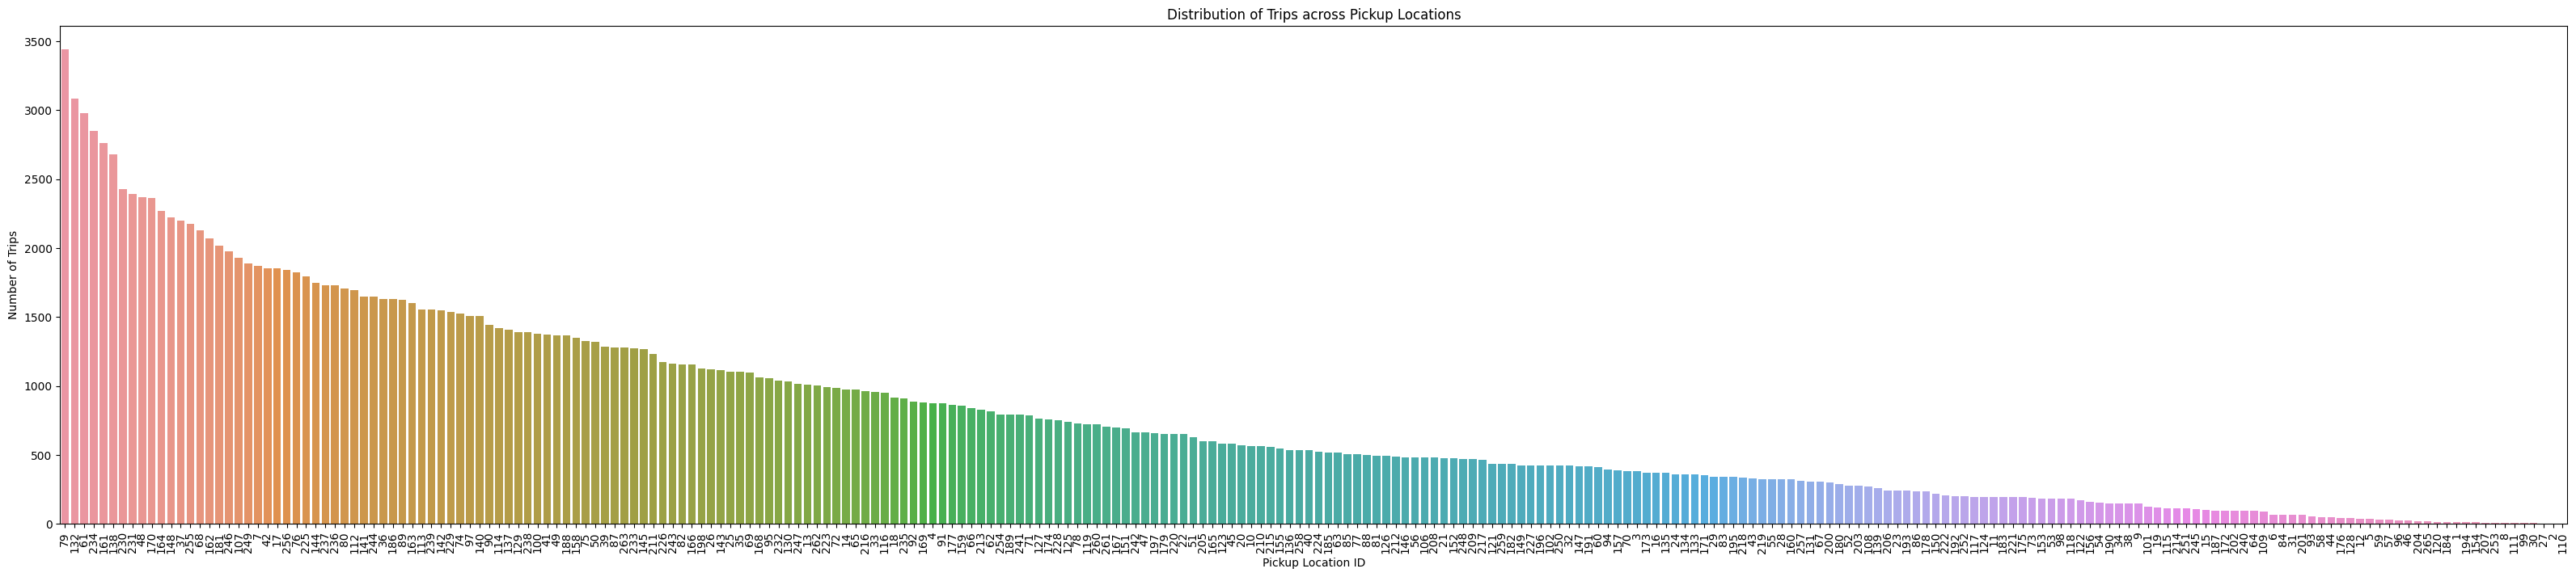

In [7]:
# Countplot of pickup locations
plt.figure(figsize=(40, 8))
sns.countplot(x='PULocationID', data=df, order=df['PULocationID'].value_counts().index)
plt.title('Distribution of Trips across Pickup Locations')
plt.xlabel('Pickup Location ID')
plt.xticks(rotation=90)
plt.ylabel('Number of Trips')
plt.show()


**Examine the distribution of trips with special flags.**

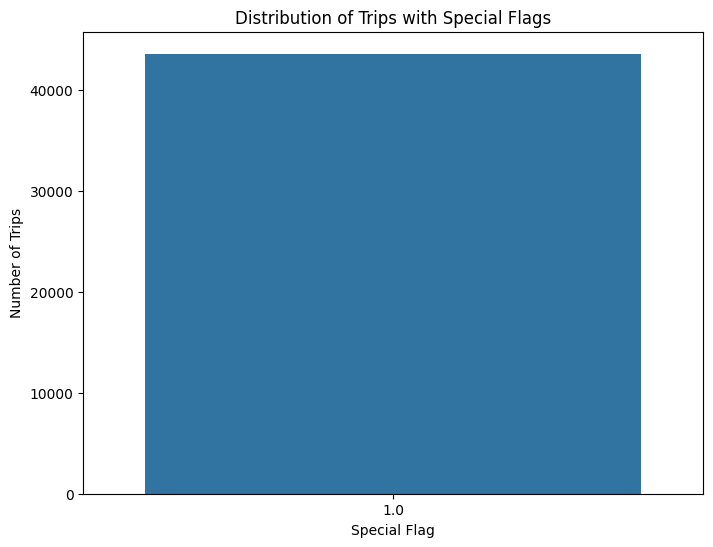

In [8]:
# Countplot of special flags
plt.figure(figsize=(8, 6))
sns.countplot(x='SR_Flag', data=df)
plt.title('Distribution of Trips with Special Flags')
plt.xlabel('Special Flag')
plt.ylabel('Number of Trips')
plt.show()


**Explore the distribution of trips over time.**

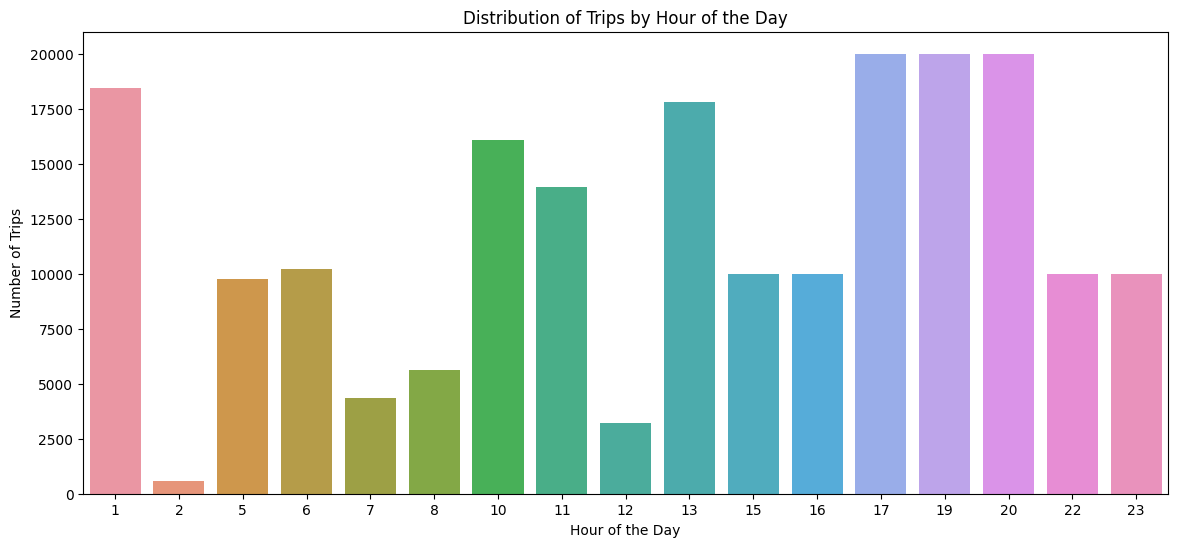

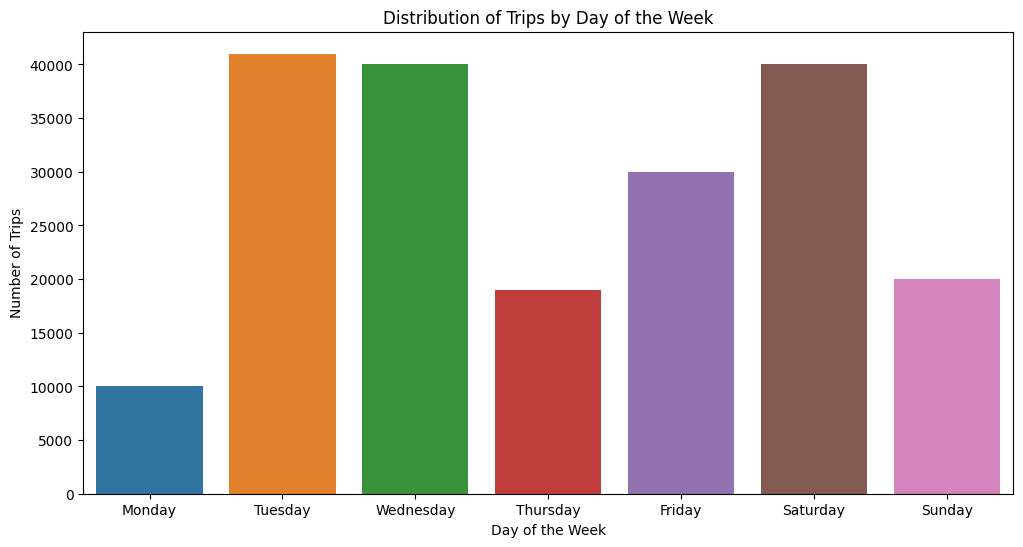

In [9]:
# Convert pickup_datetime and dropoff_datetime to datetime objects
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Extract hour and day of the week from pickup_datetime
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['pickup_datetime'].dt.day_name()

# Plot the distribution of trips by hour
plt.figure(figsize=(14, 6))
sns.countplot(x='pickup_hour', data=df)
plt.title('Distribution of Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

# Plot the distribution of trips by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()


**Explore the distribution of trips for each dispatching base.**

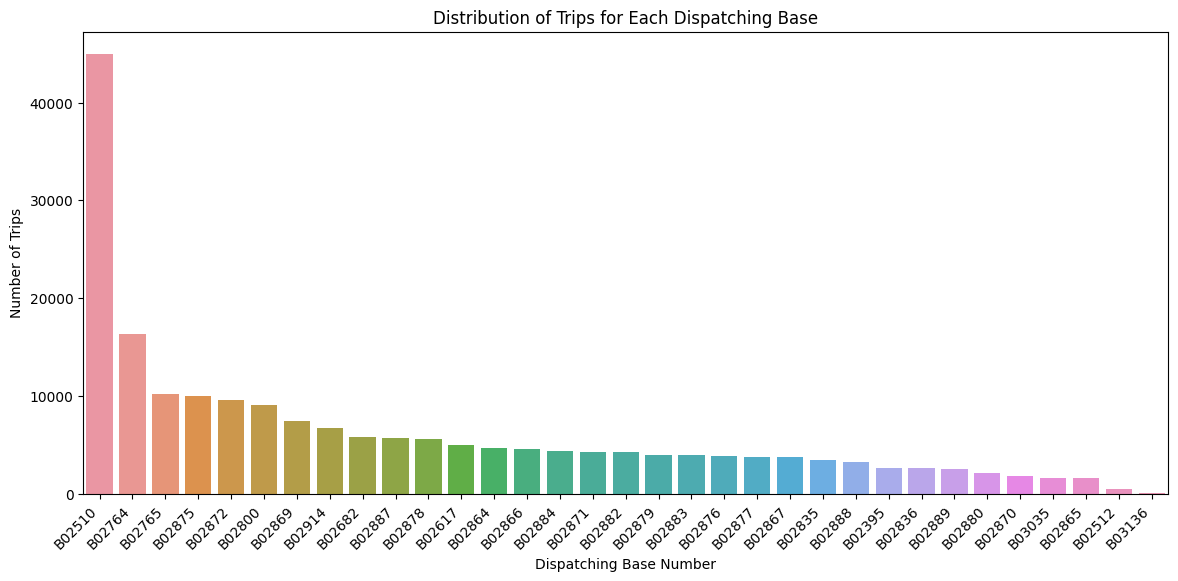

In [10]:
# Countplot of trips for each dispatching base
plt.figure(figsize=(14, 6))
sns.countplot(x='dispatching_base_num', data=df, order=df['dispatching_base_num'].value_counts().index)
plt.title('Distribution of Trips for Each Dispatching Base')
plt.xlabel('Dispatching Base Number')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.show()


**Investigate the pattern of trips with special flags over time.**

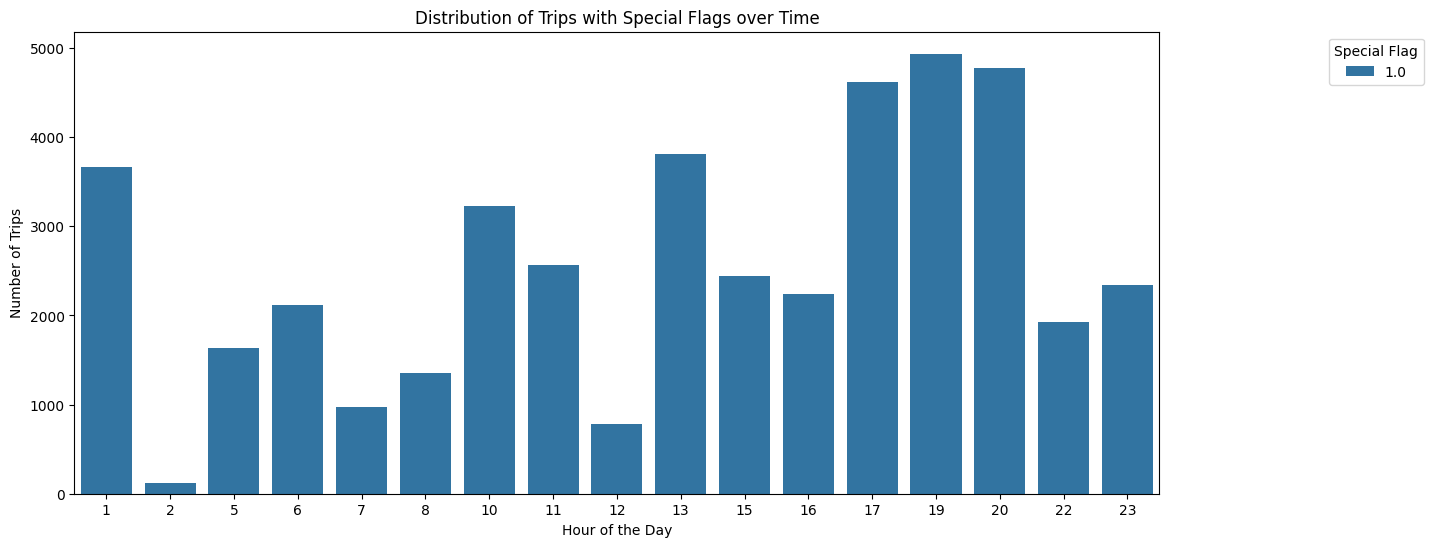

In [11]:
# Countplot of special flags for each hour
plt.figure(figsize=(14, 6))
sns.countplot(x='pickup_hour', hue='SR_Flag', data=df)
plt.title('Distribution of Trips with Special Flags over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title='Special Flag', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


**Investigate the distribution of trips during different months.**

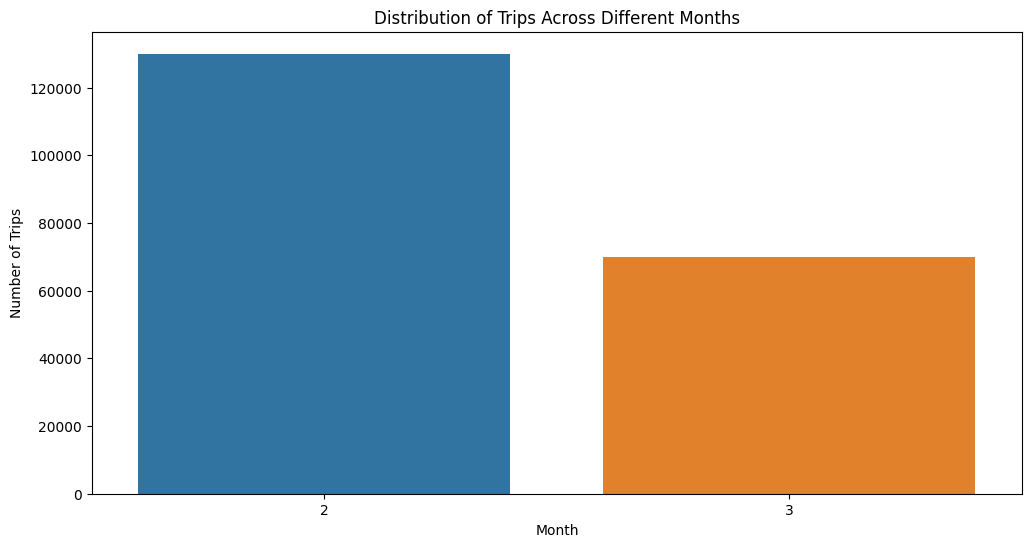

In [12]:
# Extract month from pickup_datetime
df['pickup_month'] = df['pickup_datetime'].dt.month

# Countplot of trips for each month
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_month', data=df)
plt.title('Distribution of Trips Across Different Months')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.show()


**Investigate the distribution of trip durations.**

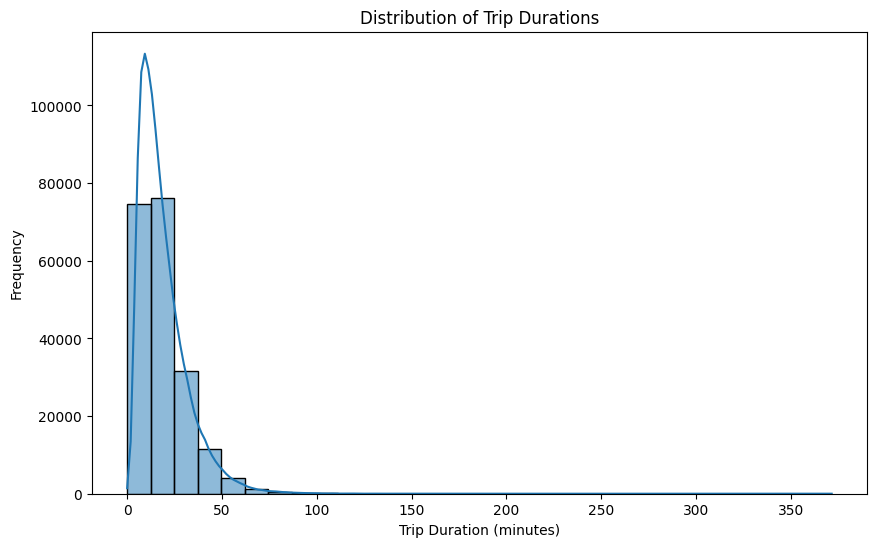

In [13]:
# Calculate trip duration in minutes
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60

# Histogram of trip durations
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration'], bins=30, kde=True)
plt.title('Distribution of Trip Durations')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


In [14]:
import plotly.express as px

**Investigate the distribution of trips based on the day of the week using a Sunburst Chart.**

In [15]:
# Extract day of the week from pickup_datetime
df['pickup_day_of_week'] = df['pickup_datetime'].dt.day_name()

# Sunburst chart of trips based on the day of the week
fig = px.sunburst(df, path=['pickup_day_of_week'], title='Distribution of Trips Based on the Day of the Week')
fig.show()


**Investigate the distribution of trips based on the hour of the day using a Line Plot**

In [16]:
# Line plot of the number of trips per hour
hourly_trip_counts = df['pickup_hour'].value_counts().sort_index().reset_index()
hourly_trip_counts.columns = ['Hour of the Day', 'Number of Trips']

fig = px.line(hourly_trip_counts, x='Hour of the Day', y='Number of Trips',
              title='Distribution of Trips Based on the Hour of the Day',
              labels={'Hour of the Day': 'Hour', 'Number of Trips': 'Number of Trips'})
fig.show()


**Visualize the distribution of trips with special flags across different pickup taxi zones using a Sunburst Chart.**

In [17]:
# Create a Sunburst chart of trips with special flags based on pickup taxi zones
special_flag_map_sunburst = df[df['SR_Flag'] == 1]

fig = px.sunburst(special_flag_map_sunburst, path=['PULocationID'],
                  title='Distribution of Trips with Special Flags Based on Pickup Taxi Zones')
fig.show()


**Explore the relationship between pickup and dropoff taxi zones using a Network Graph.**

In [18]:
# Create a Network Graph of pickup and dropoff taxi zones
network_graph_data = df.groupby(['PULocationID', 'DOLocationID']).size().reset_index()
network_graph_data.columns = ['PULocationID', 'DOLocationID', 'Number of Trips']

fig = px.scatter(network_graph_data, x='PULocationID', y='DOLocationID', size='Number of Trips',
                 title='Relationship between Pickup and Dropoff Taxi Zones',
                 labels={'Number of Trips': 'Number of Trips', 'PULocationID': 'Pickup Taxi Zone ID', 'DOLocationID': 'Dropoff Taxi Zone ID'})
fig.show()


**Investigate the distribution of trips across different dispatching bases using a Funnel Chart.**

In [19]:
# Funnel chart of trips based on dispatching bases
funnel_data = df.groupby('dispatching_base_num').size().reset_index()
funnel_data.columns = ['Dispatching Base Number', 'Number of Trips']

fig = px.funnel(funnel_data, x='Number of Trips', y='Dispatching Base Number',
                title='Distribution of Trips Across Different Dispatching Bases')
fig.show()


**Investigate the distribution of trips based on the hour of the day and different dispatching bases using a Heatmap.**

In [20]:
# Heatmap of trips based on the hour of the day and dispatching bases
heatmap_data_hourly_bases = df.groupby(['pickup_hour', 'dispatching_base_num']).size().unstack().fillna(0)

fig = px.imshow(heatmap_data_hourly_bases, x=heatmap_data_hourly_bases.columns, y=heatmap_data_hourly_bases.index,
                title='Distribution of Trips Based on Hour of the Day and Dispatching Bases',
                labels={'value': 'Number of Trips', 'pickup_hour': 'Hour of the Day', 'dispatching_base_num': 'Dispatching Base Number'})
fig.show()


**Explore the distribution of trips based on pickup taxi zones and special flags using a Treemap.**

In [21]:
# Treemap of trips based on pickup taxi zones and special flags
treemap_data = df.groupby(['PULocationID', 'SR_Flag']).size().reset_index()
treemap_data.columns = ['Pickup Taxi Zone ID', 'Special Flag', 'Number of Trips']

fig = px.treemap(treemap_data, path=['Pickup Taxi Zone ID', 'Special Flag'], values='Number of Trips',
                 title='Distribution of Trips Based on Pickup Taxi Zones and Special Flags')
fig.show()


**Investigate the distribution of trips based on the day of the week and special flags using a Sunburst Chart.**

In [22]:
# Extract day of the week from pickup_datetime
df['pickup_day_of_week'] = df['pickup_datetime'].dt.day_name()

# Sunburst chart of trips with special flags based on the day of the week
sunburst_weekday_data = df[df['SR_Flag'] == 1].groupby(['pickup_day_of_week']).size().reset_index()
sunburst_weekday_data.columns = ['Day of the Week', 'Number of Trips']

fig = px.sunburst(sunburst_weekday_data, path=['Day of the Week'], values='Number of Trips',
                  title='Distribution of Trips with Special Flags Based on the Day of the Week')
fig.show()
